[Download DATASETS from here](https://drive.google.com/drive/folders/1cBv9fiBQE2PedVPvTu56tOMIOtJTjTj1?usp=sharing)

In [1]:
import pandas as pd
pd.options.display.precision
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plasma0 = pd.read_csv('dataset\plasma_processed.csv')
serum0 = pd.read_csv('dataset\serum_processed.csv')
# serum.head()
plasma0 = plasma0.drop('Unnamed: 0', axis=1)
serum0 = serum0.drop('Unnamed: 0', axis=1)
serum0.head()

,1_5-anhydroglucitol,1-monostearin,2_3-dihydroxybutanoic acid NIST,2_4-diaminobutyric acid,2-deoxyerythritol,2-deoxytetronic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyhippuric acid,2-hydroxyvaleric acid,...,tryptophan,tyrosine,UDP-glucuronic acid,urea,uric acid,uridine,valine,xylitol,xylose,Class
0,9582,279,82,61,357,122,24944,56,32,966,...,34239,54924,43,226295,11606,68,153849,194,811,disease
1,28847,161,78,84,205,258,10680,104,49,1076,...,20080,37597,203,96226,10188,71,110735,294,910,disease
2,13627,162,53,133,139,159,27201,160,80,1117,...,29191,28707,211,155596,16617,123,95509,253,804,disease
3,20758,6671,93,78,335,225,32347,242,59,304,...,16637,27873,71,191671,15214,84,96219,157,806,disease
4,15692,108,98,69,250,120,18357,60,25,1220,...,29820,30132,200,333019,20281,62,159853,188,1226,disease


In [3]:
labels = np.reshape(plasma0.Class.to_numpy(), (82,1))

# Preprocessing

In [4]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

# standardize
for i in ['plasma', 'serum']:
    scl = StandardScaler().fit(vars()[i+'0'].iloc[:, :-1])
    stand = scl.transform(vars()[i+'0'].iloc[:, :-1])
    vars()[i] = pd.DataFrame(stand, columns = vars()[i+'0'].columns[:-1])
    vars()[i] = pd.concat([vars()[i], vars()[i+'0'].iloc[:, -1]], axis=1)

plasma.head()

,1_5-anhydroglucitol,1-monostearin,2_3-dihydroxybutanoic acid NIST,2_4-diaminobutyric acid,2-deoxyerythritol,2-deoxytetronic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyhippuric acid,2-hydroxyvaleric acid,...,tryptophan,tyrosine,UDP-glucuronic acid,urea,uric acid,uridine,valine,xylitol,xylose,Class
0,-1.315982,-0.191139,-0.314134,0.900240,0.209300,-0.666017,0.727863,-0.138580,-0.400194,-0.055432,...,0.523924,1.937765,-0.418593,0.378001,-1.016102,-0.694224,1.877948,-0.534297,0.632746,disease
1,0.702901,-0.166243,1.106687,-0.833770,-0.534704,-0.188475,-0.953771,-0.224592,-0.167457,-1.295085,...,-0.898525,0.312181,-0.180562,-0.527748,-1.243045,0.992711,-0.343225,-0.079396,-0.254870,disease
2,-0.811626,-0.195209,-0.919298,-1.272795,-0.879151,-1.013320,1.011716,-0.204851,-0.142067,0.024593,...,0.829649,-0.382834,-0.027542,-1.025622,-0.233142,1.023383,-0.795165,-0.269384,-0.882696,disease
3,-0.197261,-0.173185,-0.235199,-0.469297,-0.337221,-0.370810,1.930079,-0.161140,-0.163225,-1.024456,...,-1.106561,-0.713525,-0.424260,-0.484832,-0.477333,0.501966,-0.577998,-0.349661,-0.615033,disease
4,-0.448710,-0.154034,-0.261511,0.944419,-0.135146,0.098050,0.169166,-0.227412,-0.374804,0.193372,...,0.013588,-0.444125,0.003629,0.378170,0.762636,-0.847582,1.973716,-0.440641,1.896271,disease


# PCA, tSNE & Other Functions
## PCA

In [5]:
from sklearn.decomposition import PCA
def pca_analysis(df, n_components):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df.iloc[:, :-1].values)

    pca_concatenate = np.concatenate([pca_result, labels], axis=1)

    return pca_concatenate

In [6]:
def make_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'pc{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

In [7]:
def plotting(pca_df, n_components):
    fig, axes = plt.subplots(nrows=n_components-1, ncols=4, figsize=(20, 8))
    fig.suptitle("Principal Component Analysis",fontsize=20)

    for i in range(n_components):
        for j in range(i+1, n_components):
            if j==n_components:
                break
            axes[i, j-1].set_xlabel(f'PC{i+1}',fontsize=20)
            axes[i, j-1].set_ylabel(f'PC{j+1}',fontsize=20)
            for target, color in zip(targets,colors):
                indicesToKeep = pca_df.Class == target
                axes[i, j-1].scatter(pca_df.loc[indicesToKeep, f'pc{i+1}']
                                , pca_df.loc[indicesToKeep, f'pc{j+1}'], c = color, s = 50)
    fig.legend(targets,prop={'size': 15}, loc='upper right')

## t-SNE

In [8]:
from sklearn.manifold import TSNE
def tsne_analysis(df, n_components):
    tsne = TSNE(n_components=n_components)
    tsne_result = tsne.fit_transform(df.iloc[:, :-1].values)

    tsne_concatenate = np.concatenate([tsne_result, labels], axis=1)

    return tsne_concatenate

In [9]:
def tsne_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'tsne{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

In [10]:
def tsne_plotting(tsne_df, n_components):
    fig, axes = plt.subplots(nrows=n_components-1, ncols=4, figsize=(20, 8))
    fig.suptitle("t-SNE",fontsize=20)

    for i in range(n_components):
        for j in range(i+1, n_components):
            if j==n_components:
                break
            axes[i, j-1].set_xlabel(f'TSNE{i+1}',fontsize=20)
            axes[i, j-1].set_ylabel(f'TSNE{j+1}',fontsize=20)
            for target, color in zip(targets,colors):
                indicesToKeep = tsne_df.Class == target
                axes[i, j-1].scatter(tsne_df.loc[indicesToKeep, f'tsne{i+1}']
                                , tsne_df.loc[indicesToKeep, f'tsne{j+1}'], c = color, s = 50)
    fig.legend(targets,prop={'size': 15}, loc='upper right')

## Plasma

In [11]:
pca2_plasma = pca_analysis(plasma, 2)

pca2_plasma_df = make_dataframe(pca2_plasma, 2)
# print(pca2_plasma_df.head)

<Figure size 432x288 with 0 Axes>

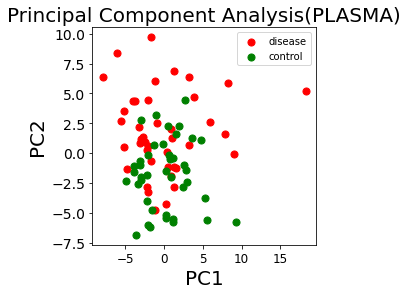

In [12]:
plt.figure()
plt.figure(figsize=(4, 4))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("Principal Component Analysis(PLASMA)",fontsize=20)
targets = ['disease', 'control']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = pca2_plasma_df.Class == target
    plt.scatter(pca2_plasma_df.loc[indicesToKeep, 'pc1']
               , pca2_plasma_df.loc[indicesToKeep, 'pc2'], c = color, s = 50)

plt.legend(targets,prop={'size': 10})

In [13]:
pca3_plasma = pca_analysis(plasma, 3)

pca3_plasma_df = make_dataframe(pca3_plasma, 3)
# print(pca3_df.head)

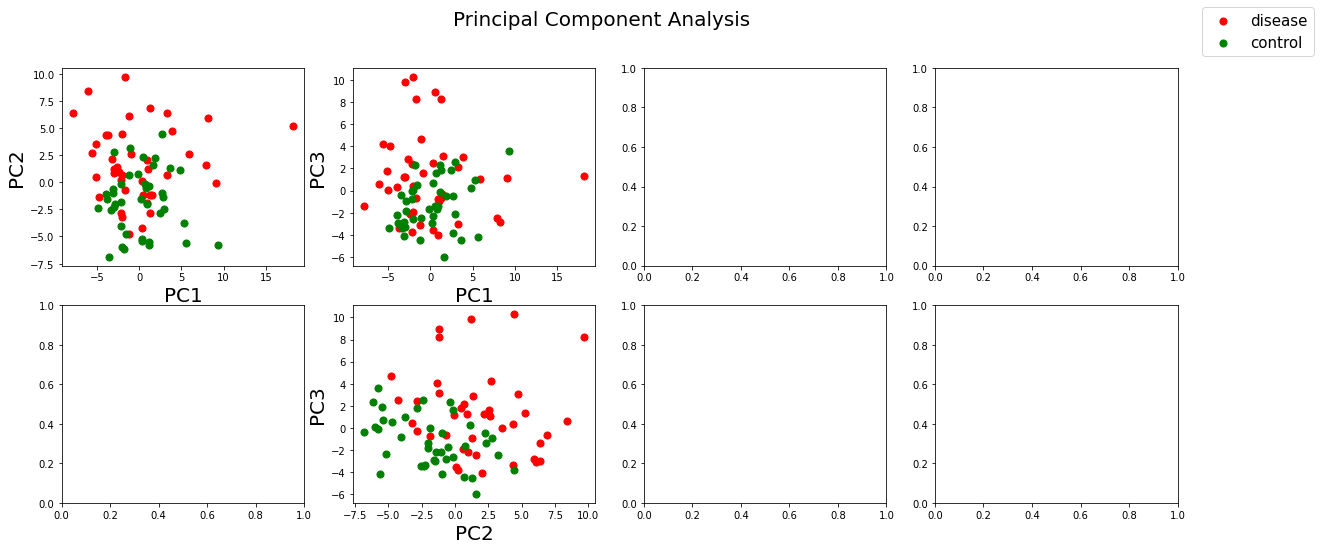

In [14]:
plotting(pca3_plasma_df, 3)

In [15]:
pca4_plasma = pca_analysis(plasma, 4)

pca4_plasma_df = make_dataframe(pca4_plasma, 4)
# print(pca4_plasma_df.head)

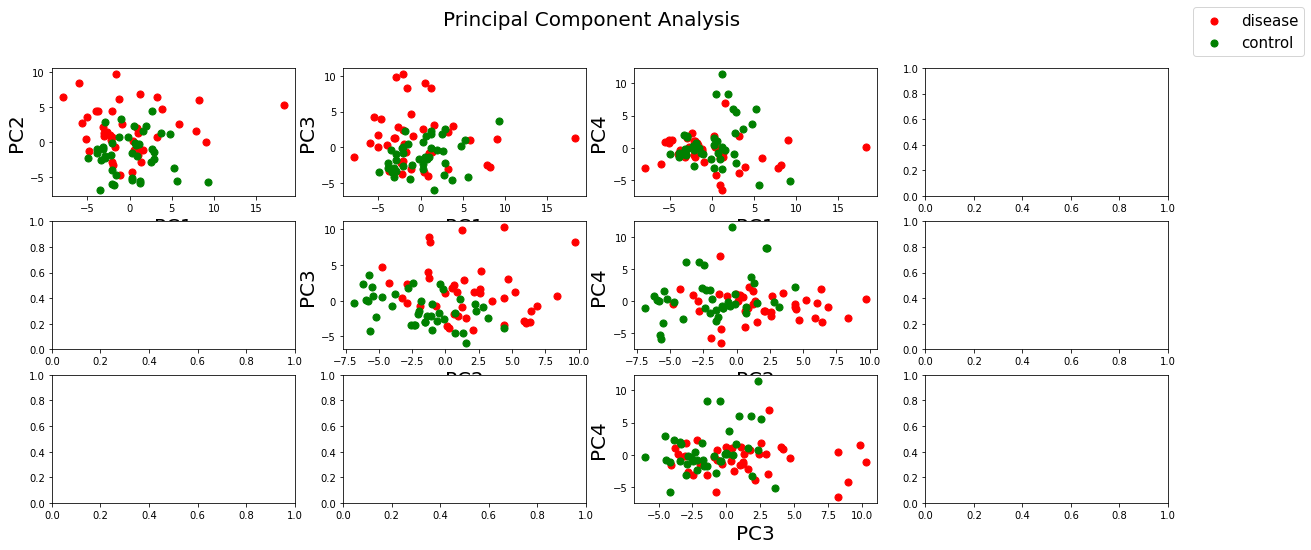

In [16]:
plotting(pca4_plasma_df, 4)

In [17]:
pca5_plasma = pca_analysis(plasma, 5)

pca5_plasma_df = make_dataframe(pca5_plasma, 5)
# print(pca5_df.head)

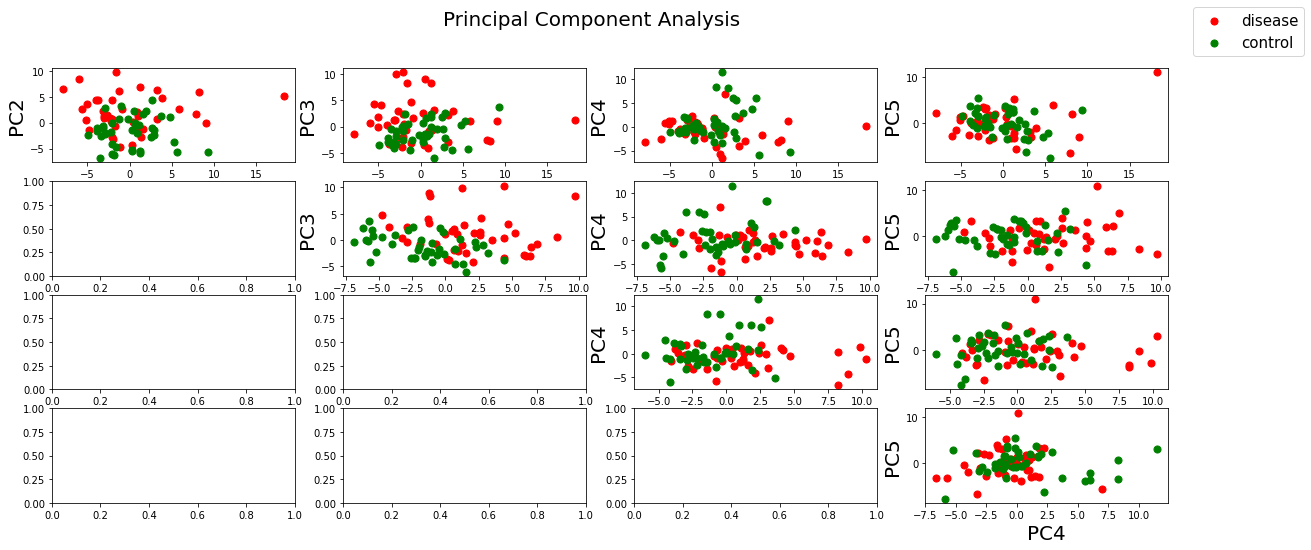

In [18]:
plotting(pca5_plasma_df, 5)

In [19]:
# now do PCA for 10, 15, 20
pca10_plasma = pca_analysis(plasma, 10)
pca10_plasma_df = make_dataframe(pca10_plasma, 10)

pca15_plasma = pca_analysis(plasma, 15)
pca15_plasma_df = make_dataframe(pca15_plasma, 15)

pca20_plasma = pca_analysis(plasma, 20)
pca20_plasma_df = make_dataframe(pca20_plasma, 20)
# print(pca20_plasma.head)

In [20]:
# pca15_plasma_df.to_csv("plasma/pca15_plasma_metabolics.csv")

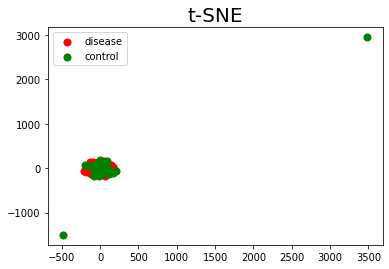

In [21]:
tsne2_plasma = tsne_analysis(plasma, 2)

tsne2_plasma_df = tsne_dataframe(tsne2_plasma, 2)
# print(tsne2_plasma_df.head)
# plotting(tsne2_plasma_df, 1, 1)
plt.title("t-SNE",fontsize=20)

for target, color in zip(targets,colors):
    indicesToKeep = tsne2_plasma_df.Class == target
    plt.scatter(tsne2_plasma_df.loc[indicesToKeep, 'tsne1']
               , tsne2_plasma_df.loc[indicesToKeep, 'tsne2'], c = color, s = 50)
plt.legend(targets,prop={'size': 10})

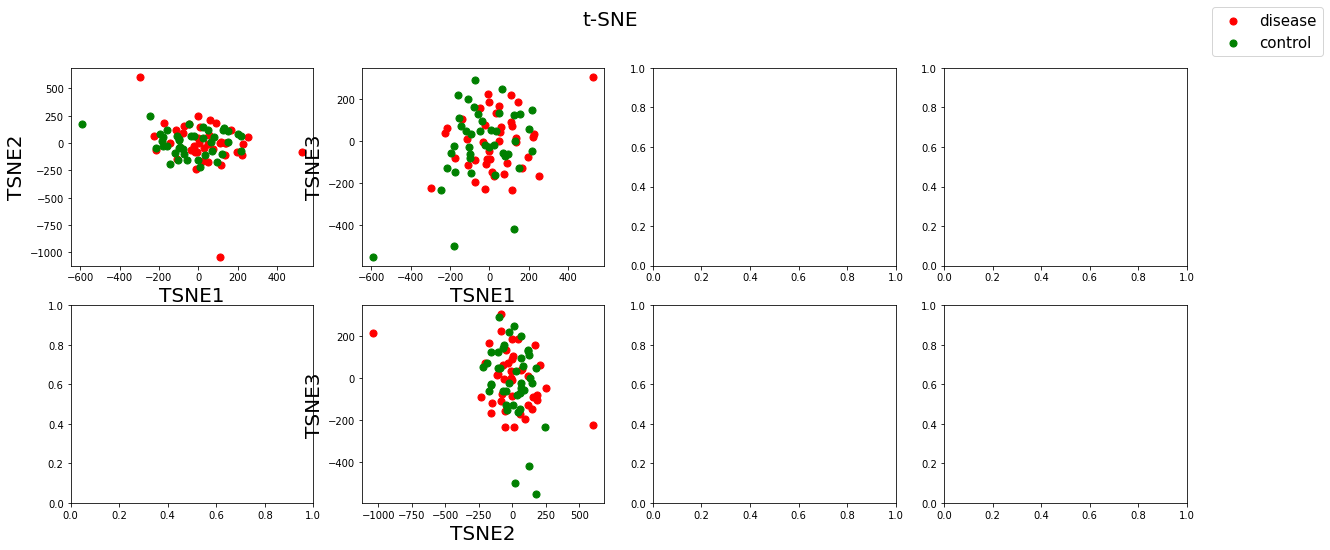

In [22]:
tsne3_plasma = tsne_analysis(plasma, 3)

tsne3_plasma_df = tsne_dataframe(tsne3_plasma, 3)
# print(tsne2_plasma_df.head)
tsne_plotting(tsne3_plasma_df, 3)


In [23]:
# tsne2_plasma_df.to_csv('plasma/tsne2_plasma_metabolics.csv')

## Serum

In [24]:
pca2_serum = pca_analysis(serum, 2)

pca2_serum_df = make_dataframe(pca2_serum, 2)
print(pca2_serum_df.head)

<bound method NDFrame.head of            pc1        pc2    Class
0     -5.19342    3.39396  disease
1    -0.107961   0.420847  disease
2     0.194706   -5.76244  disease
3      3.37146    -6.5759  disease
4     -1.89935    3.86504  disease
..         ...        ...      ...
77    -1.33265   0.874834  control
78    -2.37837    2.13826  control
79       1.167 -0.0494281  control
80  0.00594067    1.00219  control
81    -2.06376    3.95083  control

[82 rows x 3 columns]>


<Figure size 432x288 with 0 Axes>

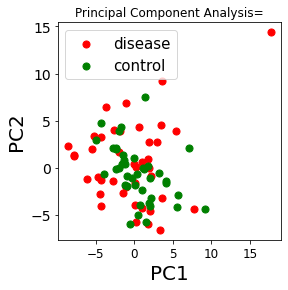

In [25]:
plt.figure()
plt.figure(figsize=(4, 4))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("Principal Component Analysis=",fontsize=12)
targets = ['disease', 'control']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = pca2_serum_df.Class == target
    plt.scatter(pca2_serum_df.loc[indicesToKeep, 'pc1']
               , pca2_serum_df.loc[indicesToKeep, 'pc2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [26]:
pca3_serum = pca_analysis(serum, 3)

pca3_serum_df = make_dataframe(pca3_serum, 3)
# print(pca3_df.head)

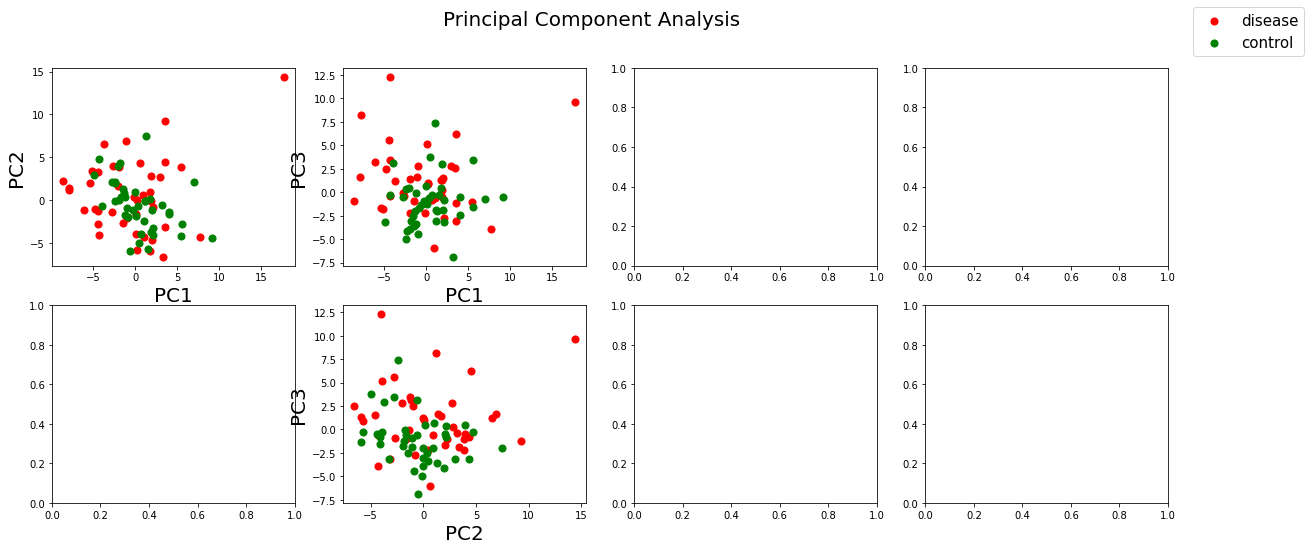

In [27]:
plotting(pca3_serum_df, 3)

In [28]:
pca4_serum = pca_analysis(serum, 4)

pca4_serum_df = make_dataframe(pca4_serum, 4)
# print(pca4_serum_df.head)

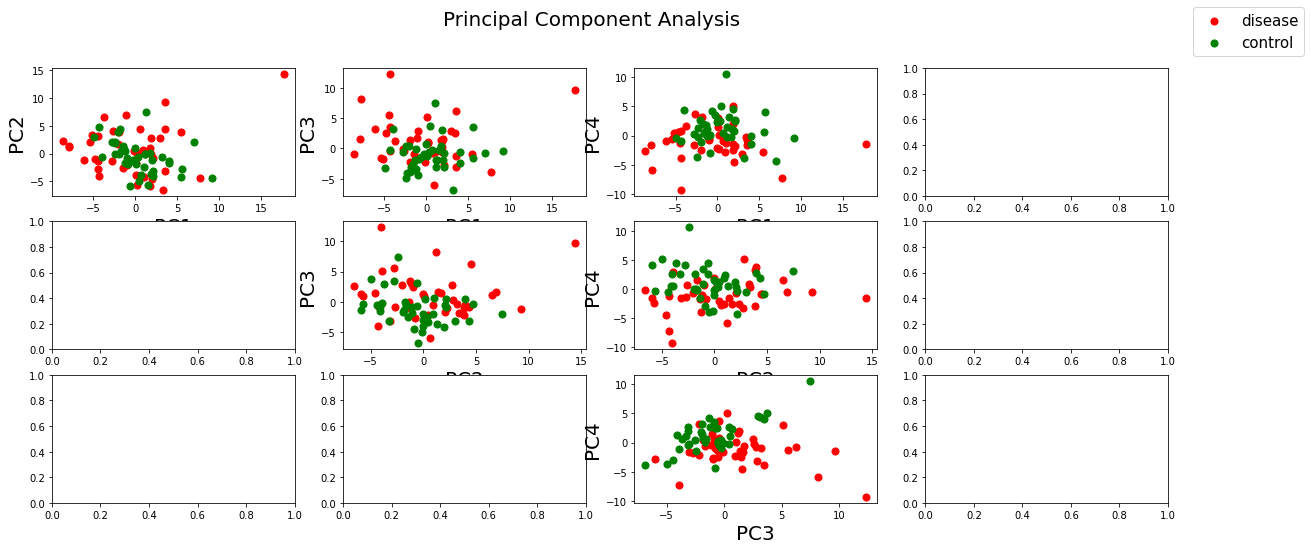

In [29]:
plotting(pca4_serum_df, 4)

In [30]:
pca5_serum = pca_analysis(serum, 5)

pca5_serum_df = make_dataframe(pca5_serum, 5)
# print(pca5_serum_df.head)

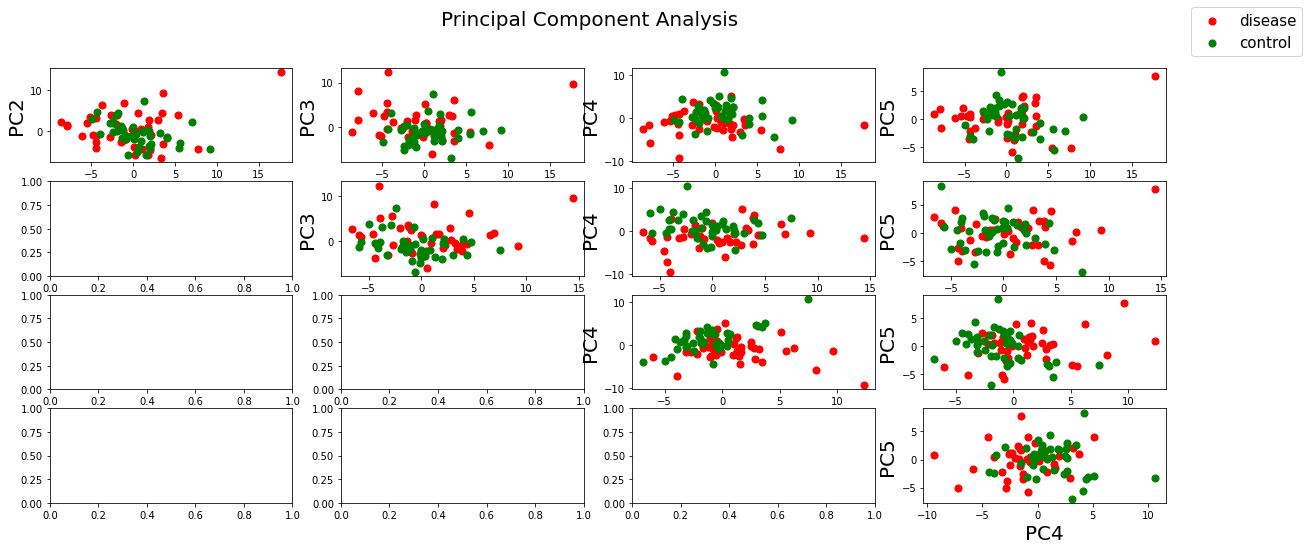

In [31]:
plotting(pca5_serum_df, 5)

In [32]:
# now do PCA for 10, 15, 20
pca10_serum = pca_analysis(serum, 10)
pca10_serum_df = make_dataframe(pca10_serum, 10)

pca15_serum = pca_analysis(serum, 15)
pca15_serum_df = make_dataframe(pca15_serum, 15)

pca20_serum = pca_analysis(serum, 20)
pca20_serum_df = make_dataframe(pca20_serum, 20)
# print(pca20_serum.head)

In [33]:
# pca15_serum_df.to_csv("serum/pca15_serum_metabolics.csv")

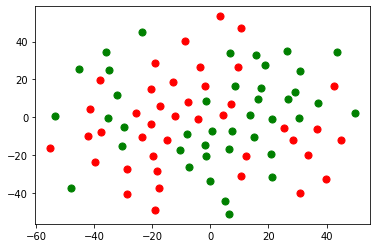

In [34]:
tsne2_serum = tsne_analysis(serum, 2)

tsne2_serum_df = tsne_dataframe(tsne2_serum, 2)
# print(tsne2_serum_df.head)
# plotting(tsne2_serum_df, 1, 1)

for target, color in zip(targets,colors):
    indicesToKeep = tsne2_serum_df.Class == target
    plt.scatter(tsne2_serum_df.loc[indicesToKeep, 'tsne1']
               , tsne2_serum_df.loc[indicesToKeep, 'tsne2'], c = color, s = 50)

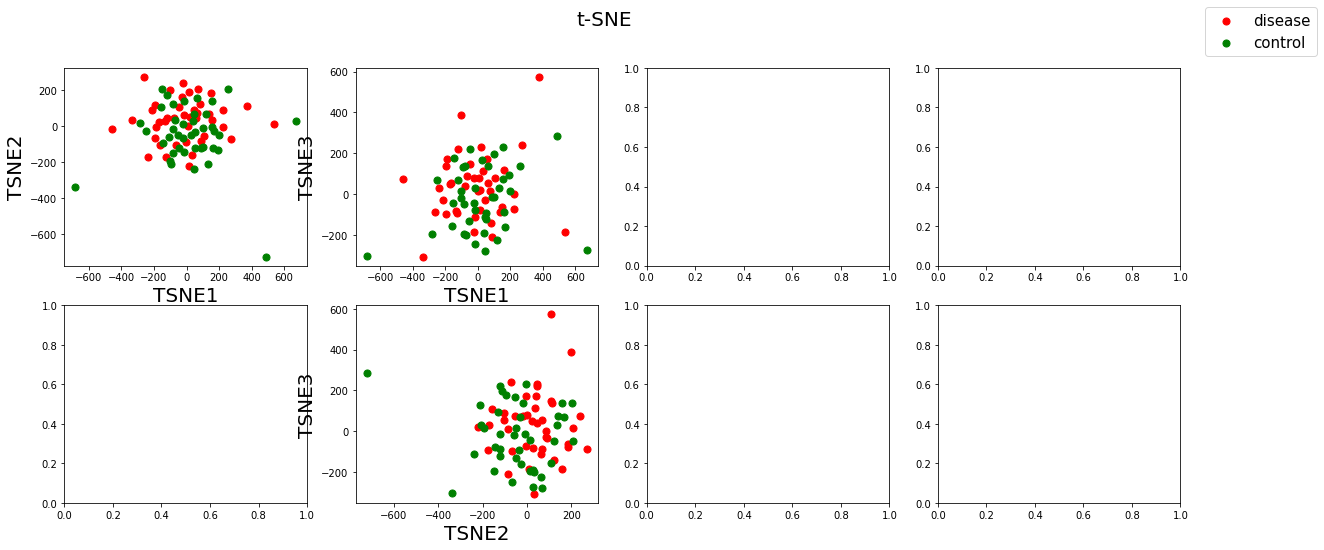

In [35]:
tsne3_serum = tsne_analysis(serum, 3)

tsne3_serum_df = tsne_dataframe(tsne3_serum, 3)
# print(tsne3_serum_df.head)
tsne_plotting(tsne3_serum_df, 3)


In [36]:
# tsne2_serum_df.to_csv('plasma/tsne2_serum_metabolics.csv')

# Models

In [37]:
# !pip install lazypredict

In [38]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report

from sklearn.model_selection import ShuffleSplit, train_test_split, StratifiedKFold

C:\Users\UTSHAB\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [39]:
def get_xy(df):
  X = df.drop('Class', axis=1)
  X = X.apply(pd.to_numeric)
  y = df['Class'].copy()
  y = y.map({"control": 0, "disease": 1})
  return X, y

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder

In [41]:
pca2_plasma_df.dtypes

pc1      object
pc2      object
Class    object
dtype: object

In [42]:
# # make the independent variables float type
# pca2_plasma_df['Class'].map({"control": 0, "disease": 1})
# plasma = pca2_plasma_df.apply(pd.to_numeric)
# plasma

In [43]:
model_names = ['ExtraTreeClassifier', 'DecisionTreeClassifier', 'XGBClassifier',
       'RandomForestClassifier', 'NearestCentroid', 'KNeighborsClassifier',
       'QuadraticDiscriminantAnalysis', 'LinearSVC', 'BaggingClassifier',
       'SGDClassifier', 'LogisticRegression', 'LGBMClassifier',
       'CalibratedClassifierCV', 'GaussianNB', 'BernoulliNB',
       'PassiveAggressiveClassifier', 'LabelSpreading', 'LabelPropagation',
       'ExtraTreesClassifier', 'Perceptron', 'LinearDiscriminantAnalysis',
       'RidgeClassifier', 'AdaBoostClassifier', 'NuSVC', 'SVC',
       'RidgeClassifierCV', 'DummyClassifier']

In [44]:
full_result = []
accuracy = []
for k in [0]:
    if k==0:
        name = ['Serum(Specific Metabolics)']
        dfs = [serum]
    elif k==22 or k==23:
        name = [f'tsne{k-20}_plasma(Specific Metabolics)', f'tsne{k-20}_serum(Specific Metabolics)']
        dfs = [vars()[f'tsne{k-20}_plasma_df'], vars()[f'tsne{k-20}_serum_df']]
    else:
        if k>10:
            name = [f'pca{k}_plasma(Specific Metabolics)']
            dfs = [vars()[f'pca{k}_plasma_df']]
        else:
            name = [f'pca{k}_plasma(Specific Metabolics)', f'pca{k}_serum(Specific Metabolics)']
            dfs = [vars()[f'pca{k}_plasma_df'], vars()[f'pca{k}_serum_df']]
    
    random_state = 42

    for idx, data in enumerate(dfs):
      result = []
      X, y = get_xy(data)
      rs = ShuffleSplit(n_splits=1, test_size=.2, random_state=random_state)
      
      for train_index, test_index in rs.split(X):
        clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        models, predictions = clf.fit(X_train, X_test, y_train, y_test)
        result.append(models)

      acc = []
      for i in range(1):
        acc.append(result[i].iloc[0]['Balanced Accuracy'])

#       print(f'\n{name[idx]}: {sum(acc)/len(acc)}')
#       accuracy.append([f'{name[idx]}', f'{sum(acc)/len(acc)}'])
        
      full_result.append(result)

100%|██████████| 29/29 [00:00<00:00, 36.66it/s]


In [45]:
model_topper = {}
for i in model_names:
    vars()[i] = [0, 0.0]
    model_topper[i] = vars()[i]
for i in range(1):
    for j in range(len(model_names)):
        if full_result[0][i].index[0] == model_names[j]:
            vars()[model_names[j]][0] += 1
        vars()[model_names[j]][1] += full_result[0][i].loc[model_names[j]]['Balanced Accuracy']
        model_topper[model_names[j]] = vars()[model_names[j]]

model_topper

{'AdaBoostClassifier': [0, 0.8636363636363636],
 'BaggingClassifier': [0, 0.7348484848484849],
 'BernoulliNB': [1, 0.9090909090909092],
 'CalibratedClassifierCV': [0, 0.7348484848484849],
 'DecisionTreeClassifier': [0, 0.6439393939393939],
 'DummyClassifier': [0, 0.606060606060606],
 'ExtraTreeClassifier': [0, 0.606060606060606],
 'ExtraTreesClassifier': [0, 0.8181818181818181],
 'GaussianNB': [0, 0.696969696969697],
 'KNeighborsClassifier': [0, 0.6515151515151515],
 'LGBMClassifier': [0, 0.696969696969697],
 'LabelPropagation': [0, 0.5],
 'LabelSpreading': [0, 0.5],
 'LinearDiscriminantAnalysis': [0, 0.6136363636363636],
 'LinearSVC': [0, 0.6515151515151515],
 'LogisticRegression': [0, 0.6515151515151515],
 'NearestCentroid': [0, 0.606060606060606],
 'NuSVC': [0, 0.6893939393939394],
 'PassiveAggressiveClassifier': [0, 0.6515151515151515],
 'Perceptron': [0, 0.4772727272727273],
 'QuadraticDiscriminantAnalysis': [0, 0.6136363636363636],
 'RandomForestClassifier': [0, 0.825757575757575

In [ ]:
accuracy = []
for k in [0, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 22, 23]:
    if k==0:
        name = ['Plasma(Raw)', 'Serum(Raw)']
        dfs = [plasma, serum]
    elif k==22 or k==23:
        name = [f'tsne{k-20}_plasma', f'tsne{k-20}_serum']
        dfs = [vars()[f'tsne{k-20}_plasma_df'], vars()[f'tsne{k-20}_serum_df']]
    else:
        name = [f'pca{k}_plasma', f'pca{k}_serum']
        dfs = [vars()[f'pca{k}_plasma_df'], vars()[f'pca{k}_serum_df']]
    
    random_state = 42

    for idx, data in enumerate(dfs):
      result = []
      X, y = get_xy(data)
      rs = ShuffleSplit(n_splits=1, test_size=.2, random_state=random_state)
      raw_x = X
      for train_index, test_index in rs.split(X):
        clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        scaler = RobustScaler()

        cols = X_train.columns
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        X_train = pd.DataFrame(X_train, columns=[cols])
        X_test = pd.DataFrame(X_test, columns=[cols])

        models, predictions = clf.fit(X_train, X_test, y_train, y_test)
        result.append(models)

      acc = []
      for i in range(1):
         for j in range(len(model_names)):
           if result[i].index[j] == 'AdaBoostClassifier':
             acc.append(result[i].loc['AdaBoostClassifier']['Balanced Accuracy'])

      print(f'\n{name[idx]}: {sum(acc)/len(acc)}')
      accuracy.append([f'{name[idx]}', f'{sum(acc)/len(acc)}'])

  3%|▎         | 1/29 [00:00<00:03,  9.17it/s]


Plasma(Raw): 0.7424242424242424


  7%|▋         | 2/29 [00:00<00:01, 19.23it/s]


Serum(Raw): 0.8636363636363636


  7%|▋         | 2/29 [00:00<00:01, 19.05it/s]


pca2_plasma: 0.4318181818181818


  7%|▋         | 2/29 [00:00<00:01, 19.42it/s]


pca2_serum: 0.3484848484848485


In [44]:
accuracy_df = pd.DataFrame(accuracy, columns=['Processed Dataset', 'Accuracy'])

In [45]:
accuracy_df.to_csv('accuracy/accuracy_Raw.csv')
accuracy_df['Accuracy'] = accuracy_df['Accuracy'].astype(float)
accuracy_df.dtypes

Processed Dataset     object
Accuracy             float64
dtype: object

In [46]:
accuracy_metabolics = pd.read_csv('accuracy/accuracy_Specific Metabolics.csv', float_precision='high').drop('Unnamed: 0', axis = 1)
accuracy_metabolics.head()

,Processed Dataset,Accuracy
0,Plasma(Specific Metabolics),0.88
1,Serum(Specific Metabolics),0.93
2,pca2_plasma(Specific Metabolics),0.90
3,pca2_serum(Specific Metabolics),0.89
4,pca3_plasma(Specific Metabolics),0.89


In [47]:
final_acc = pd.concat([accuracy_df, accuracy_metabolics], ignore_index=True)
final_acc.to_csv('accuracy/accuracy_final.csv')
final_acc

,Processed Dataset,Accuracy
0,Plasma(Raw),0.87
1,Serum(Raw),0.85
2,pca2_plasma,0.80
3,pca2_serum,0.70
4,pca3_plasma,0.83
5,pca3_serum,0.78
6,pca4_plasma,0.86
7,pca4_serum,0.83
8,pca5_plasma,0.83
9,pca5_serum,0.83
